In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [47]:
geneDF = pd.read_csv('data.csv')
geneDF = geneDF.rename(columns = {'Unnamed: 0': 'samples'})

In [48]:
# look for columns with all 0's

def isZero(dataframe):
    columnsWithZeros = []
    for i in range(1, 20532):
        if not dataframe[dataframe.columns[i]].any():
            #print(dataframe.columns[i])
            columnsWithZeros.append(dataframe.columns.values[i])
    return columnsWithZeros


In [49]:
columnsWithZeros = isZero(geneDF)

In [50]:
# drop columns with zeros
geneDropped = geneDF.drop(columns = columnsWithZeros)
geneDropped.head()

,samples,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [51]:
# check genes
geneDF['gene_5'].unique()

array([0.])

In [52]:
# generate matrix for SVD
geneMatrix = geneDropped.drop(columns = 'samples').to_numpy()
geneMatrix

array([[ 0.        ,  2.01720929,  3.26552691, ...,  8.92132623,
         5.28675919,  0.        ],
       [ 0.        ,  0.59273209,  1.58842082, ...,  9.39785429,
         2.09416849,  0.        ],
       [ 0.        ,  3.51175898,  4.32719872, ..., 10.09046974,
         1.68302267,  0.        ],
       ...,
       [ 0.        ,  3.24958187,  3.70749166, ...,  9.46671072,
         4.6774575 ,  0.5866927 ],
       [ 0.        ,  2.59033853,  2.78797567, ..., 10.40058062,
         5.71875068,  0.        ],
       [ 0.        ,  2.32524248,  3.80593214, ...,  9.84479363,
         4.55071601,  0.        ]])

In [53]:
scaler = StandardScaler()
geneMatrixScaled = scaler.fit_transform(geneMatrix)

pca = PCA(n_components=801)
Y = pca.fit(geneMatrixScaled)
var_exp = Y.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

In [54]:
# want to find components that are causing the most variance but also find the number of dimensions 
# that keep 0.8 of variance
#use expplained variance ratio and put together in a plot
x = ["PC%s" %i for i in range(1,40)]
trace1 = go.Bar(
    x=x,
    y=list(var_exp),
    name="Explained Variance")

trace2 = go.Scatter(
    x=x,
    y=cum_var_exp,
    name="Cumulative Variance")

layout = go.Layout(
    title='Variance',
    xaxis=dict(title='Principle Components', tickmode='linear'))

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
fig.show()


In [55]:
labels = pd.read_csv('labels.csv')
labels = labels.rename(columns = {'Unnamed: 0': 'sample', 'Class': 'cancer'})
labels = labels.drop(columns = ['sample'])
labels.head()

,cancer
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [56]:
y_train = labels

In [68]:
# Project first three components

Y_train_pca = pca.fit_transform(geneMatrixScaled)

traces = []
for name in ['BRCA', 'KIRC', 'COAD', 'LAUD', 'PRAD']:
    trace = go.Scatter3d(
        x=Y_train_pca[y_train.cancer==name,0],
        y=Y_train_pca[y_train.cancer==name,1],
        z=Y_train_pca[y_train.cancer==name,2],
        mode='markers',
        name=name,
        marker=go.Marker(size=5, line=go.Line(width=1),opacity=1))
    
    traces.append(trace)

layout = go.Layout(
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC2'),
    title="Projection of First Three Principle Components"
)

data = traces
fig = go.Figure(data=data, layout=layout)

fig.show()

/home/lia/anaconda3/envs/python368/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/home/lia/anaconda3/envs/python368/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




In [58]:
saveFile = pd.read_csv('save.txt', names = ['scoreColumn'])

In [59]:
saveFile.head()

,scoreColumn
0,Score PC 1: 0.0124571467556
1,Score PC 2: 0.343663899672
2,Score PC 3: 0.223957800471
3,Score PC 4: 0.491055288133
4,Score PC 5: 0.292681421793


In [60]:
saveFile['PC'] = saveFile['scoreColumn'].str.split(':').str[0]
saveFile['score'] = saveFile['scoreColumn'].str.split(':').str[-1]
saveFile.head()


,scoreColumn,PC,score
0,Score PC 1: 0.0124571467556,Score PC 1,0.0124571467556
1,Score PC 2: 0.343663899672,Score PC 2,0.343663899672
2,Score PC 3: 0.223957800471,Score PC 3,0.223957800471
3,Score PC 4: 0.491055288133,Score PC 4,0.491055288133
4,Score PC 5: 0.292681421793,Score PC 5,0.292681421793


In [61]:
saveFile2 = saveFile.drop(columns = ['scoreColumn'])
saveFile2.head(10)

,PC,score
0,Score PC 1,0.0124571467556
1,Score PC 2,0.343663899672
2,Score PC 3,0.223957800471
3,Score PC 4,0.491055288133
4,Score PC 5,0.292681421793
5,Score PC 6,0.254546447319
6,Score PC 7,0.0687745880894
7,Score PC 8,0.0829115490603
8,Score PC 9,0.0945479902363
9,Score PC 10,0.0432050664022


In [62]:
saveSorted = saveFile2.sort_values(by = ['score'], ascending = False)
saveSorted['score'] = saveSorted['score'].astype('float64')


In [63]:
saveSorted.head(10)

,PC,score
3,Score PC 4,0.491055
1,Score PC 2,0.343664
4,Score PC 5,0.292681
5,Score PC 6,0.254546
2,Score PC 3,0.223958
8,Score PC 9,0.094548
7,Score PC 8,0.082912
6,Score PC 7,0.068775
798,Score PC 799,0.053862
15,Score PC 16,0.053479


In [64]:
saveSorted.sum()


PC       Score PC 4Score PC 2Score PC 5Score PC 6Score ...
score                                              13.8075
dtype: object

In [65]:
Y_train_pca = pca.fit_transform(geneMatrixScaled)

traces = []
for name in ['BRCA', 'KIRC', 'COAD', 'LAUD', 'PRAD']: 
    trace = go.Scatter3d(
        x=Y_train_pca[y_train.cancer==name,3],
        y=Y_train_pca[y_train.cancer==name,1],
        z=Y_train_pca[y_train.cancer==name,4],
        mode='markers',
        name=name,
        marker=go.Marker(size=2, line=go.Line(width=1),opacity=1))
    
    traces.append(trace)

layout = go.Layout(
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC2'),
    title="Projection of First Three Principle Components"
)

data = traces
fig = go.Figure(data=data, layout=layout)

fig.show()

/home/lia/anaconda3/envs/python368/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/home/lia/anaconda3/envs/python368/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




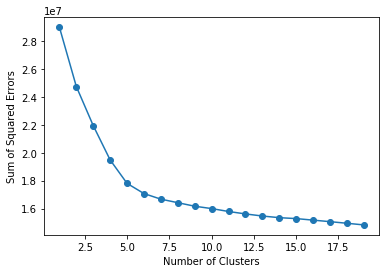

In [28]:
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=40, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(geneMatrix)
    distortions.append(km.inertia_)


# plot k clusters (x) against sum of squared errors within clusters (y axis)
# ideally minimum k clusters because SSE could be 0 if we put each point in its own cluster

plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [30]:
km = KMeans(
    n_clusters = 5, init = 'random',
    n_init=40, max_iter=300, 
    tol=1e-04, random_state=0)

sampleClusters = km.fit(geneMatrix)


In [38]:
sampleClusterLabels = sampleClusters.labels_
sampleClusterDF = pd.DataFrame(sampleClusterLabels, columns = ['labels'])
sampleClusterDF.head()

,labels
0,1
1,0
2,1
3,1
4,3


In [42]:
compareClusters = pd.concat([labels, sampleClusterDF], axis=1, sort=False)
#result = pd.concat([df1, df4], axis=1, sort=False)


In [66]:
compareClusters.head(10)

,cancer,labels
0,PRAD,1
1,LUAD,0
2,PRAD,1
3,PRAD,1
4,BRCA,3
5,PRAD,1
6,KIRC,4
7,PRAD,1
8,BRCA,3
9,PRAD,1
